<a href="https://colab.research.google.com/github/jagatabhay/miscellaneous/blob/master/S11_Assignment_Exp-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/jagatabhay/TSAI.git

Cloning into 'TSAI'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 388 (delta 18), reused 0 (delta 0), pack-reused 355
Receiving objects: 100% (388/388), 2.46 MiB | 2.25 MiB/s, done.
Resolving deltas: 100% (183/183), done.


In [3]:
from TSAI.S11 import CustomResNet
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Device : ",device)
model = CustomResNet.CustomResNet().to(device)
print("Model Loaded Successfully ")

Device :  cuda
Model Loaded Successfully 


In [4]:
from TSAI.S11 import albumentationstransform
albumentationstransform_train_transforms = albumentationstransform.train_transforms()
from TSAI.S11 import dataloader
trainloader , testloader = dataloader.datasetloader(albumentationstransform_train_transforms , batchsize = 30 , numwork = 4 )
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

REQUIRED LIBRARIES LOADED...


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
INFO : Trainloader and Testloader Done


In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9 ,weight_decay = 0.01)

 LR Scheduler Loaded Successfully 


/content/TSAI/S11/CustomResNet.py:57: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Learning rate search finished. See the graph with {finder_name}.plot()


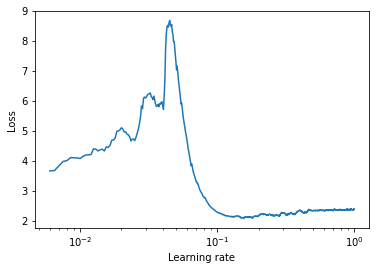

In [6]:
from TSAI.S11 import LRScheduler
lrfinder = LRScheduler.LRFinder(model, optimizer , criterion , device = "cuda")
lrfinder.range_test(trainloader , end_lr = 1, num_iter = 2000 , step_mode = "linear")
lrfinder.plot()